# ml_09
## 커널 서포트 벡터 머신
Kernel Support Vector Machine (Kernel SVM)

In [6]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


- 유방암 데이터 (569개)
- 타겟명 : malignant(악성,0), benign(양성,1)
- 30개의 속성

In [7]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

In [12]:
print(cancer.target_names)
for i,name in enumerate(cancer.feature_names):
    print(i,name)

['malignant' 'benign']
0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


- 아래는 유방암 데이터를 다양한 C 와 gamma 옵션에 대해 적용한 것이다
- 출력값을 보면 테스터 데이터에서 60% 대의 좋지 않은 결과를 보여준다

In [8]:
from sklearn.svm import SVC

C=[0.001,0.01,0.1,1,10,100,1000,10000]
s_train=[]
s_test=[]

for C in [0.1,1,1000]:
    for gamma in [0.1,1,10]:
        model=SVC(C=C,gamma=gamma)
        model.fit(X_train,y_train)

        print('\n>>> C: %.1f, gamma: %.1f' % (C,gamma))
        print('Train Score: %f' % model.score(X_train,y_train))
        print('Test Score: %f' % model.score(X_test,y_test))


>>> C: 0.1, gamma: 0.1
Train Score: 0.617371
Test Score: 0.657343

>>> C: 0.1, gamma: 1.0
Train Score: 0.617371
Test Score: 0.657343

>>> C: 0.1, gamma: 10.0
Train Score: 0.617371
Test Score: 0.657343

>>> C: 1.0, gamma: 0.1
Train Score: 1.000000
Test Score: 0.657343

>>> C: 1.0, gamma: 1.0
Train Score: 1.000000
Test Score: 0.657343

>>> C: 1.0, gamma: 10.0
Train Score: 1.000000
Test Score: 0.657343

>>> C: 1000.0, gamma: 0.1
Train Score: 1.000000
Test Score: 0.657343

>>> C: 1000.0, gamma: 1.0
Train Score: 1.000000
Test Score: 0.657343

>>> C: 1000.0, gamma: 10.0
Train Score: 1.000000
Test Score: 0.657343


In [19]:
len(y_train), np.bincount(y_train), np.bincount(y_train)[1]/len(y_train)

(426, array([163, 263], dtype=int32), 0.61737089201877937)

- 아래의 boxplot 을 보면 속성에 따라 값의 스케일이 크게 다름을 알수 있다
- 이런 경우 데이터에 대한 정규화(전처리)가 꼭 필요하다

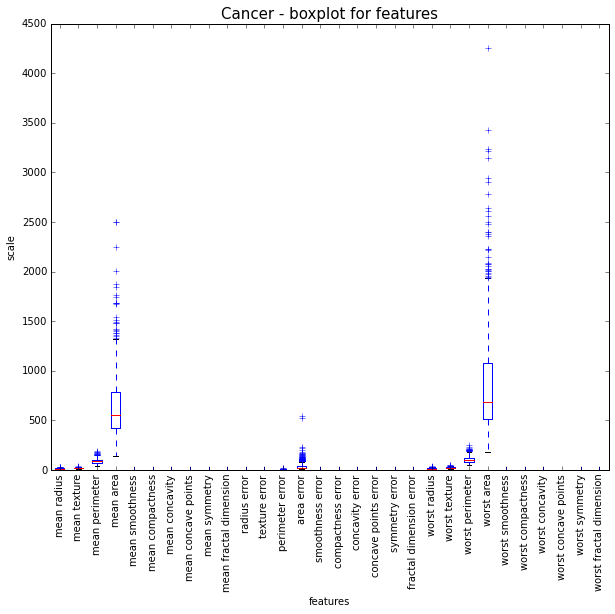

In [35]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features',fontsize=15)
plt.boxplot(cancer.data)
#plt.yscale('symlog')
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
print('')